



<div style="background: linear-gradient(135deg, #314136ff 0%, #339af0 100%); padding: 25px; border-radius: 10px; color: white;">
<h1 style="margin: 0; font-size: 2.5em;">🎯 K-Nearest Neighbors (KNN)</h1>
<p style="font-size: 1.2em; margin-top: 10px; opacity: 0.9;">The Simplest Yet Powerful Machine Learning Algorithm</p>
</div>

## 📌 Core Concept

Simplest ML algorithm that predicts based on **similarity to neighboring data points**. Works for both classification and regression by finding `k` closest points and using their values.

---

## 🏷️ KNN for Classification

### Dataset Structure 

| Component | Explanation |
|-----------|-------------|
| **Features** | Input values like height, weight, marks, pixels, etc. that describe a data point |
| **Output** | Final class or label — binary (0 or 1) or multiple classes |
| **Data** | Already available labeled data where each data point has a known answer and can be imagined as points on a graph |


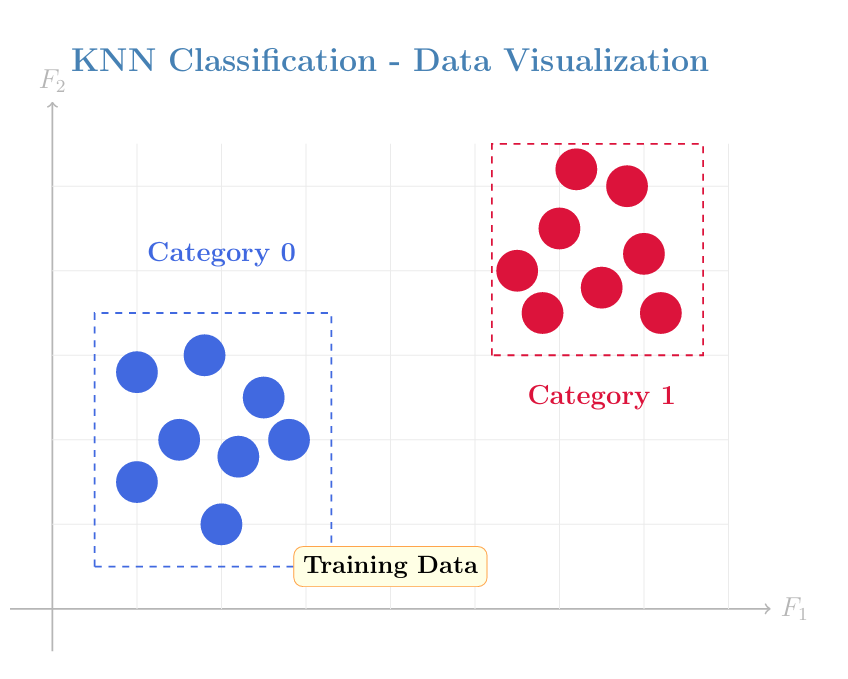

### Algorithm Steps

<div style="border-left: 4px solid #2ecc71; padding-left: 15px; margin: 10px 0;">

**Step 1: Initialize k value**
- `k` = number of neighbors to consider
- Can be any value: $k \in \{1, 2, 3, \ldots\}$
- Selected via hyperparameter tuning

</div>

<div style="border-left: 4px solid #2ecc71; padding-left: 15px; margin: 10px 0;">

**Step 2: Find k nearest neighbors**
- Calculate distance from test point to all training points
- Select top `k` closest points

</div>

<div style="border-left: 4px solid #2ecc71; padding-left: 15px; margin: 10px 0;">

**Step 3: Count category votes**
- Count how many neighbors belong to each category
- Example: If k=5 → 2 neighbors class 0, 3 neighbors class 1

</div>

<div style="border-left: 4px solid #2ecc71; padding-left: 15px; margin: 10px 0;">

**Step 4: Predict majority class**
- Test point assigned to category with maximum neighbors
- In example above → Predict class 1

</div>

<div style="background: linear-gradient(135deg, #314136ff 0%, #339af0 100%); padding: 15px; border-radius: 8px; color: white; margin: 15px 0;">
<strong>⚠️ Important:</strong> The entire prediction depends on finding nearest neighbors using distance metrics.
</div>

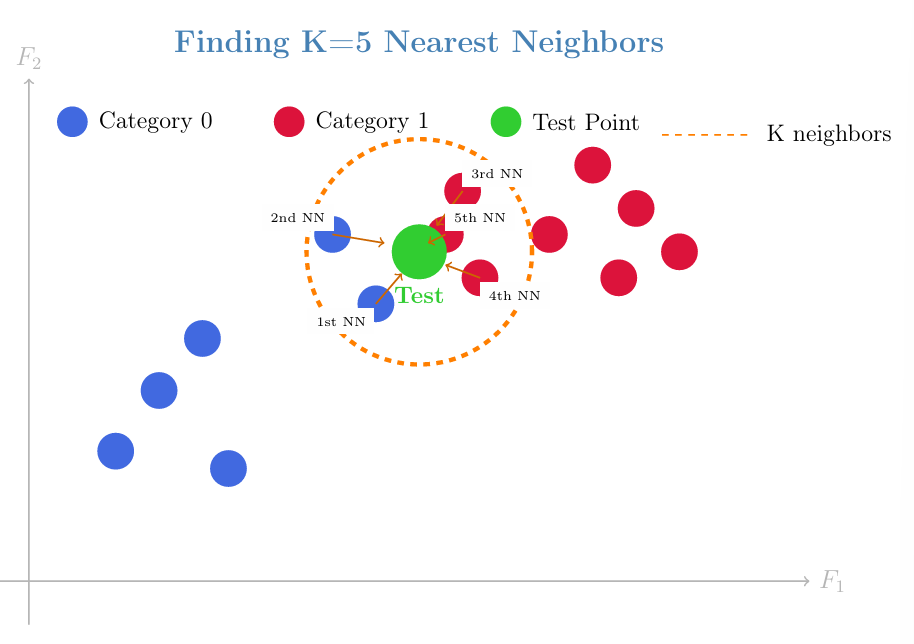

---

## 📏 Distance Metrics

### 1. Euclidean Distance

**2D Formula:**
$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

**n-Dimensional Formula:**
$$d = \sqrt{\sum_{i=1}^{n}(p_i - q_i)^2}$$

**Use Cases:**
- ✈️ Straight-line distance (as the crow flies)
- 🛫 Flight paths, air traffic control
- 📊 Features randomly distributed in feature space

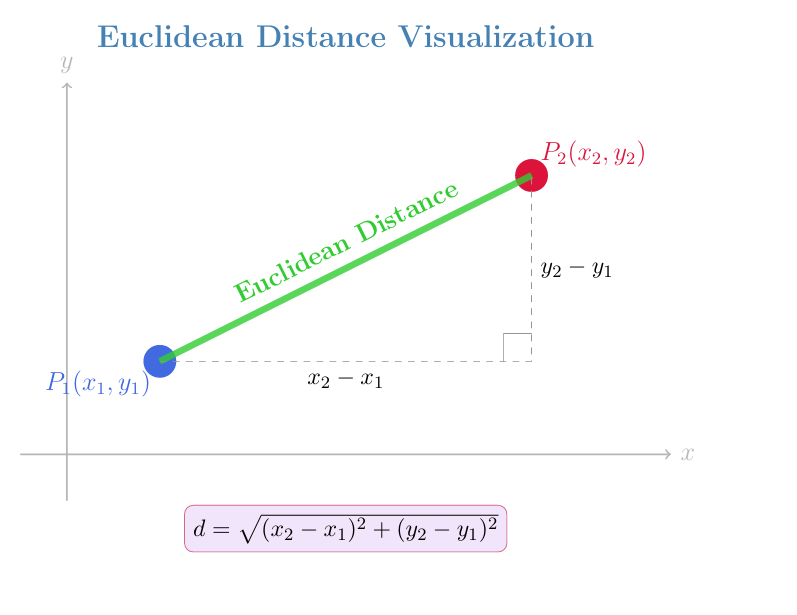
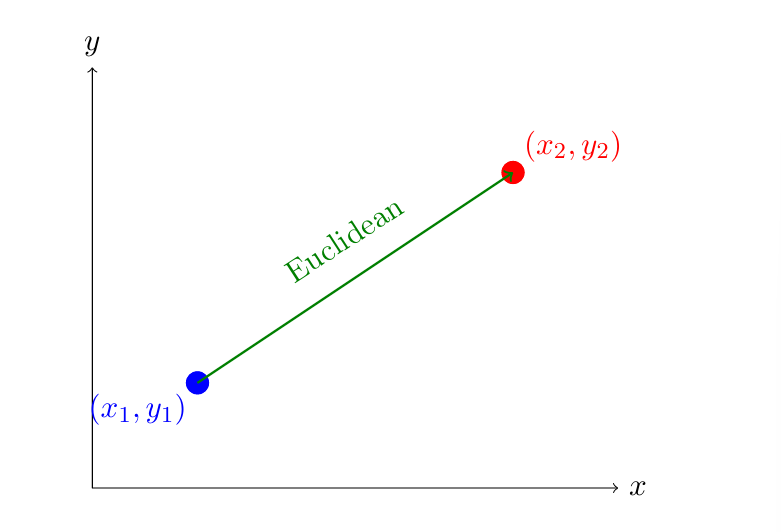

### 2. Manhattan Distance

**2D Formula:**
$$d = |x_2 - x_1| + |y_2 - y_1|$$

**n-Dimensional Formula:**
$$d = \sum_{i=1}^{n}|p_i - q_i|$$

**Use Cases:**
- 🏙️ City block navigation (grid-based paths)
- 🚕 Uber/taxi distance in block-structured cities
  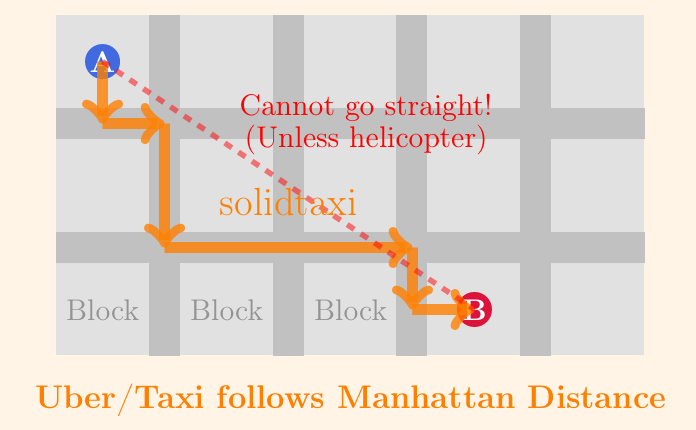
- ➡️ Movement restricted to axes only ( Cannot move diagonally )

<div style="background-color: #3b2b8bff; border: 1px solid #2ecc71; padding: 15px; border-radius: 8px; margin: 15px 0;">
<strong>💡 Tip:</strong> Which to use? Try both via hyperparameter tuning and pick the one with higher accuracy. Euclidean is more commonly used.
</div>

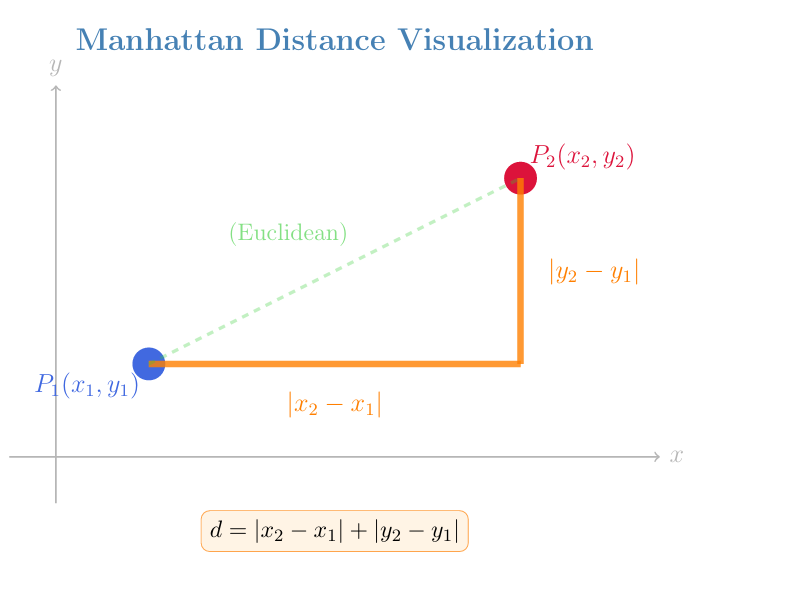
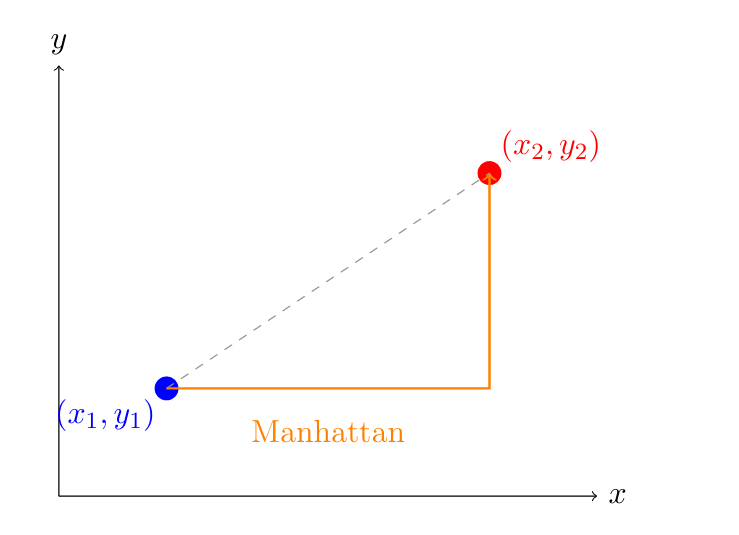

---

## 📈 KNN for Regression

**Key Difference:** Output is continuous value (not category)

**Example:** Predicting house price based on size

### Steps:
1. Find `k` nearest neighbors (same as classification)
2. Calculate **average** of all `k` neighbor values
3. Use average as prediction

$$\text{Prediction} = \frac{1}{k} \sum_{i=1}^{k} y_i$$

<div style="background-color: #5f3f9aff; border: 1px solid #2ecc71; padding: 15px; border-radius: 8px; margin: 15px 0;">
<strong>📝 Note:</strong> If outliers present, use <strong>median</strong> instead of mean for better robustness.
</div>

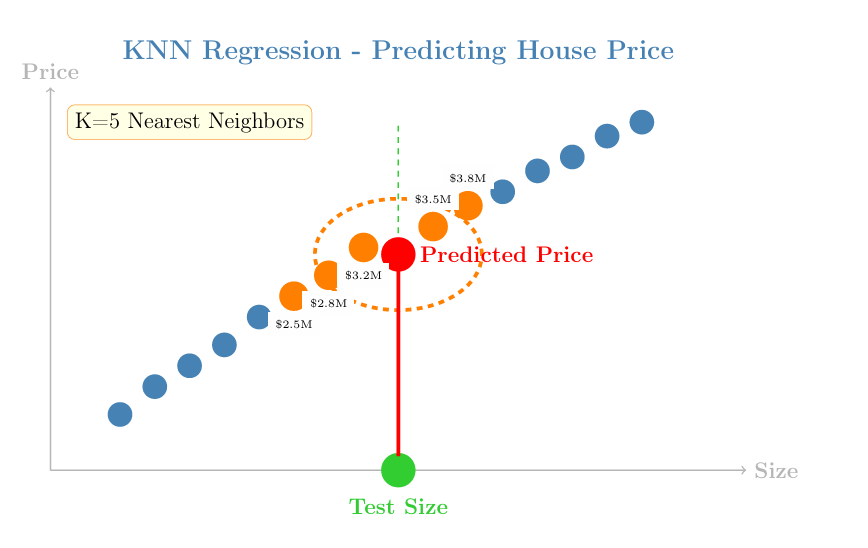

---

## ⏱️ Problem: Time Complexity

<div style="background: linear-gradient(135deg, #314136ff 0%, #339af0 100%); padding: 15px; border-radius: 8px; color: white; margin: 15px 0;">
<strong>⚠️ Warning:</strong><br>
For each test point, must calculate distance to <strong>ALL training points</strong>.<br><br>
Time Complexity = <code>O(n)</code> where n = number of training samples<br><br>
Becomes very slow with millions of data points.
</div>

**Solution:** Use tree-based variants to optimize distance calculations

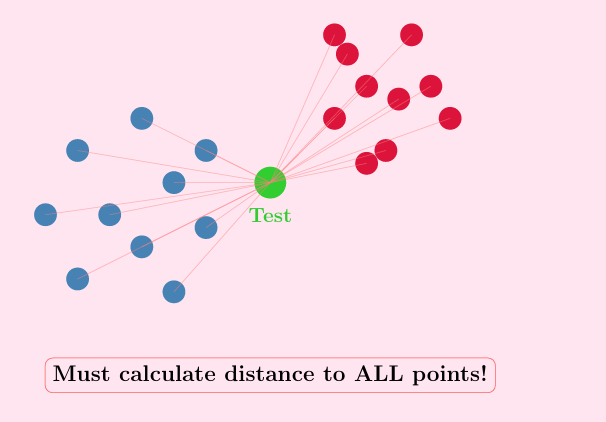

---

## 🌳 KNN Variants - Optimization

### 1. K-d Tree (K-Dimensional Tree)

**Concept:** Organize data points into binary tree structure to reduce search space

#### Construction Process:

| Step | Action | Result |
|------|--------|--------|
| 1 | Find median of $F_1$ | Vertical split line |
| 2 | Find median of $F_2$ | Horizontal split line |
| 3 | Alternate $F_1, F_2, F_1, F_2...$ | Hierarchical binary tree |

#### Example:


Data points: `(8,1), (7,2), (2,3), (5,4), (4,7), (9,6)`
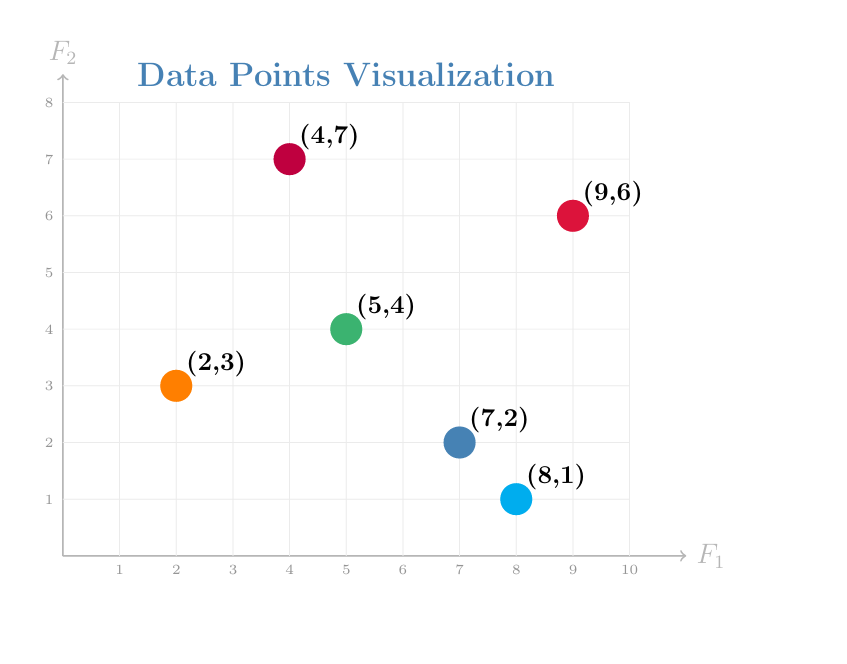


#### 🔹 Step 1: First Split (Root Node – X-axis)

<mark style="background-color: #2bc31eff;">Dimension: x (1st dimension)</mark>


**What we do**
- Consider only **x-coordinates (F₁)**  
  → `2, 4, 5, 7, 8, 9`

**Median Calculation**
- Middle values: `5` and `7`  
- Median = `(5 + 7) / 2 = 6.5`

**Important Note**
- No data point exists at `x = 6.5`
- Choose the closest valid x-coordinate  
  → **x = 7**

**Root Node**
- Selected point: **(7, 2)**

**Action**
- Draw a **vertical line** at `x = 7`
- Space is divided into:
  - **Left region:** `x < 7`
  - **Right region:** `x > 7`


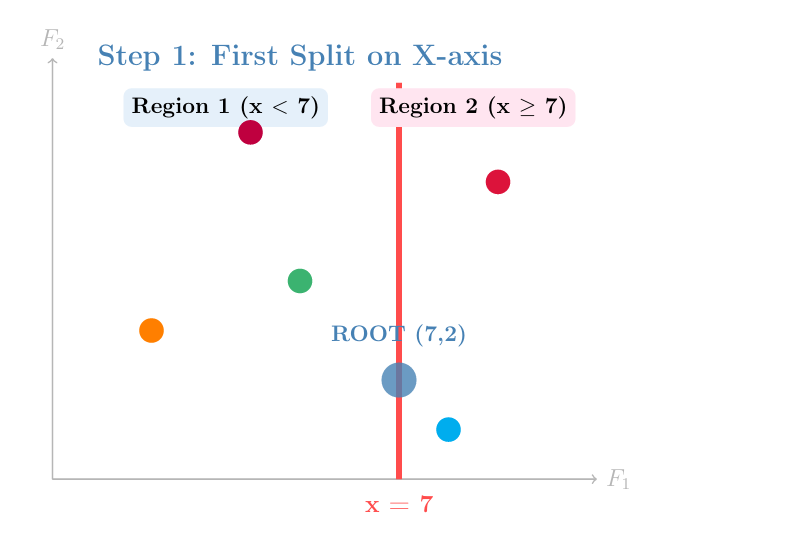

#### 🔹 Step 2: Second Split (Left Subtree of Root – Y-axis)

<mark style="background-color: #2bc31eff;">Dimension: y (2nd dimension)</mark>

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;">
<b>NOTE:</b> 
Now first Recursively complete the left subtree of the root node.Then backtrack after the leaf node, to complete the right subtree of the root node.
</div>


**What we do**
- Work only on points with `x < 7`
  → `(2,3), (4,7), (5,4)`
- Switch splitting axis to **y (F₂)**

**Y-coordinates**
- `3, 7, 4`

**Median Calculation**
- Sorted: `3, 4, 7`
- Median = `4`

**Node**
- Selected point: **(5, 4)**

**Action**
- Draw a **horizontal line** at `y = 4` (inside left region)
- Space is divided into:
  - **Below:** `y < 4`
  - **Above:** `y ≥ 4`

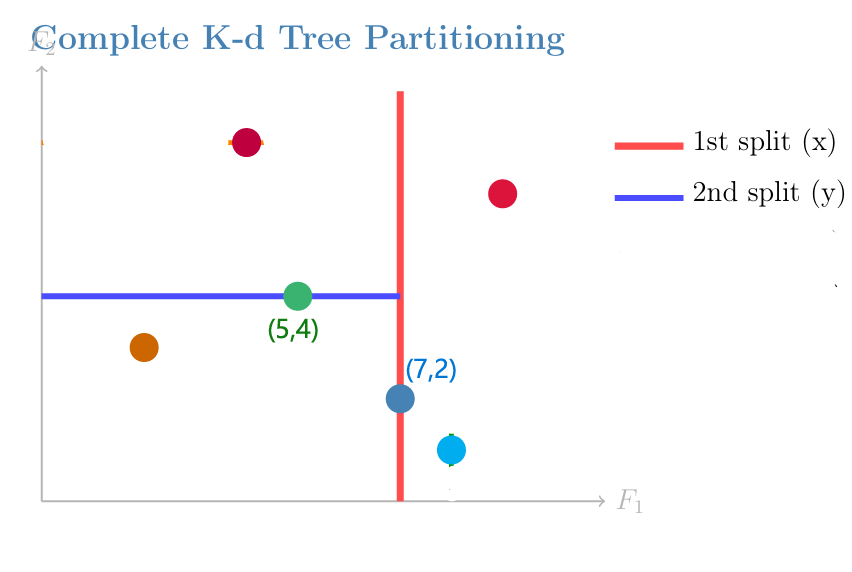
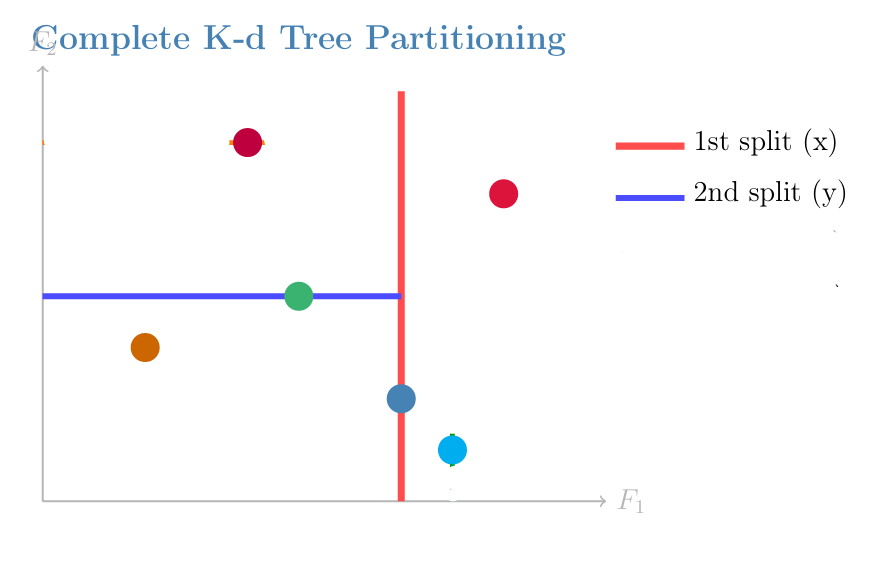

#### 🔹 Step 3: Third Split (Left Subtree of (5,4) – X-axis)

<mark style="background-color: #2bc31eff;">Dimension: x (1st dimension)</mark>


**What we do**
- Points with `y < 4`
  → `(2,3)`
- Switch axis back to **x (F₁)**

**Result**
- Only one point available

**Node**
- **(2,3)** → Leaf node

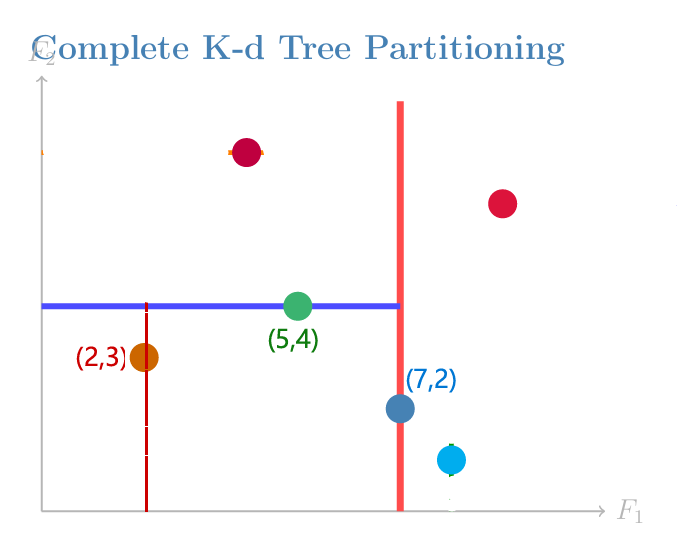

#### 🔹 Step 4: Third Split (Right Subtree of (5,4) – X-axis)

<mark style="background-color: #2bc31eff;">Dimension: x (1st dimension)</mark>

**What we do**
- Points with `y ≥ 4`
  → `(4,7)`
- Split on **x-axis**

**Result**
- Only one point available

**Node**
- **(4,7)** → Leaf node

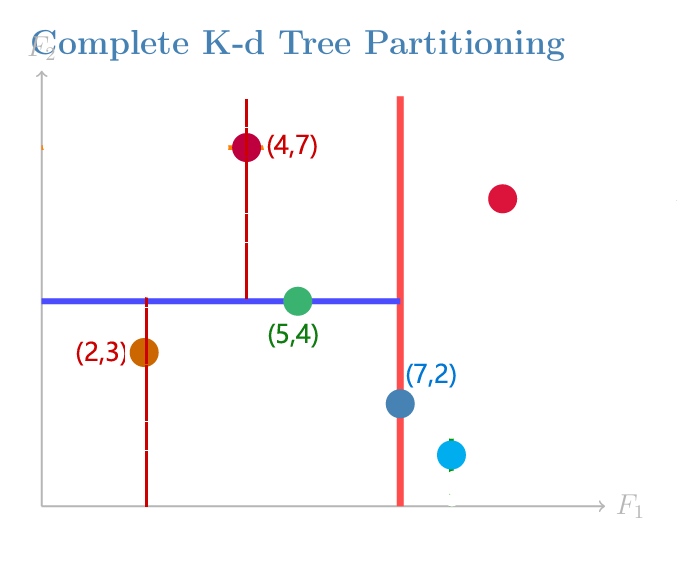

#### 🔹 Step 5: Second Split (Right Subtree of Root – Y-axis)

<mark style="background-color: #2bc31eff;">Dimension: y (2nd dimension)</mark>

**What we do**
- Work only on points with `x ≥ 7`
  → `(8,1), (9,6)`
- Split on **y-axis (F₂)**

**Y-coordinates**
- `1, 6`

**Median Calculation**
- Median ≈ `6`

**Node**
- Selected point: **(9, 6)**

**Action**
- Draw a **horizontal line** at `y = 6`
- Space is divided into:
  - **Below:** `y < 6`
  - **Above:** `y ≥ 6`

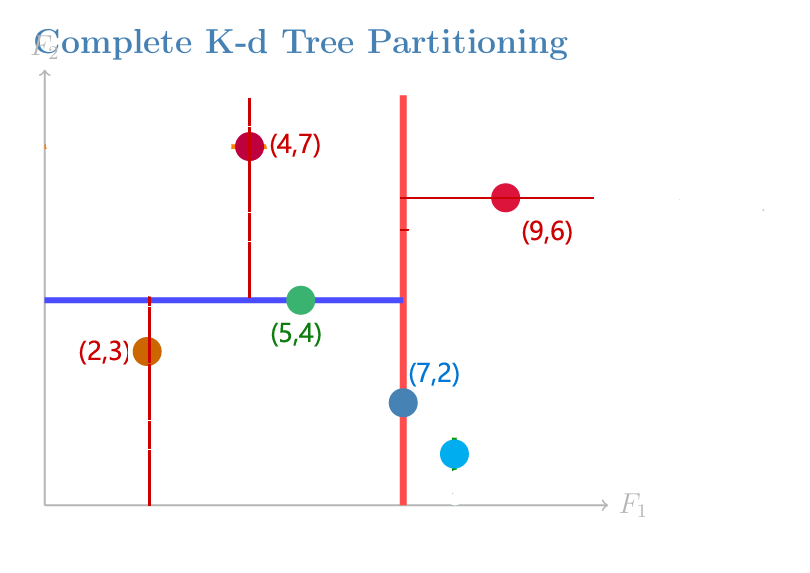

#### 🔹 Step 6: Third Split (Left Subtree of (9,6) – X-axis)

<mark style="background-color: #2bc31eff;">Dimension: x (1st dimension)</mark>

**What we do**
- Points with `y < 6`
  → `(8,1)`
- Split on **x-axis**

**Result**
- Only one point available

**Node**
- **(8,1)** → Leaf node

#### The resulting KD Tree will look like this:

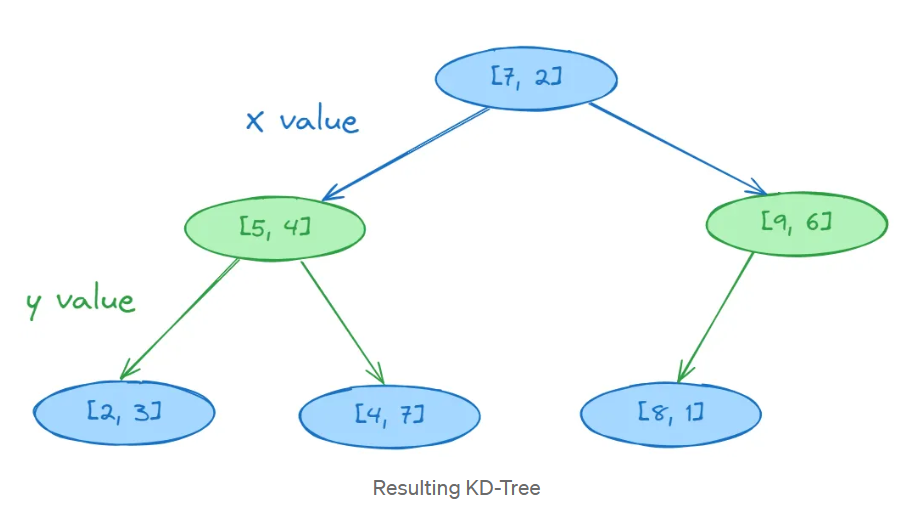

### 🔍  Searching in K-d Tree

#### Example: 1st Nearest Neighbor Search
- **Query point:** `(5, 7)`

---

#### 🔹 Step-by-Step Search Process

**Step 1: Start at Root Node**
- Current node: **(7,2)**
- Split axis: **X**
- Check: `5 < 7` → **YES**
- **Action:** Go to **LEFT subtree**

---

**Step 2: Move to Node (5,4)**
- Split axis: **Y**
- Check: `7 ≥ 4` → **YES**
- **Action:** Go to **RIGHT subtree**

---

**Step 3: Reach Leaf Node**
- Current node: **(4,7)**
- **Result:** This is the **nearest point so far**

---



### 2. Ball Tree

**Concept:** Group nearby points into clusters (balls), avoid backtracking

#### Construction Process:

1. **Identify nearby points** → Find clusters of close points
2. **Create initial groups** → $G_1, G_2, G_3, G_4$
3. **Merge nearest groups** → $G_5 = G_1 + G_2$, $G_6 = G_3 + G_4$
4. **Final merge** → $G_7 = G_5 + G_6$

**Binary Tree Structure:**
```
                    G7 (all points)
                   /              \
              G5 (1-4)          G6 (5-9)
             /      \            /      \
         G1(1,2)  G2(3,4)    G3(5-7)  G4(8,9)
```

<div style="background: linear-gradient(135deg, #314136ff 0%, #339af0 100%); padding: 15px; border-radius: 8px; color: white; margin: 15px 0;">
<strong>⚠️ Important:</strong> Ball Tree is better than K-d Tree because:
<ul>
<li>No backtracking needed</li>
<li>Faster search for nearest neighbors</li>
<li>Better for high-dimensional data</li>
</ul>
</div>

---

## 💻 Implementation - Scikit-learn

### Key Parameters

| Parameter | Default | Description |
|-----------|---------|-------------|
| `n_neighbors` | 5 | The k value - number of neighbors |
| `algorithm` | 'auto' | Options: 'auto', 'ball_tree', 'kd_tree', 'brute' |
| `p` | 2 | p=2 → Euclidean, p=1 → Manhattan |
| `weights` | 'uniform' | 'uniform' or 'distance' |

In [1]:
# Classification Example

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix

# Create dataset
X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_classes=2,
    n_informative=3,
    n_redundant=0,
    random_state=42
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize KNN classifier
knn = KNeighborsClassifier(
    n_neighbors=5,      # k value
    algorithm='auto',   # auto-select best algorithm
    p=2                 # Euclidean distance
)

# Train model
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:\n{cm}")

Accuracy: 0.9450

Confusion Matrix:
[[103   7]
 [  4  86]]


In [2]:
# Regression Example

from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create regression dataset
X, y = make_regression(
    n_samples=1000,
    n_features=2,
    random_state=42
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize KNN regressor
knn_reg = KNeighborsRegressor(
    n_neighbors=6,
    algorithm='auto',
    p=2
)

# Train
knn_reg.fit(X_train, y_train)

# Predict
y_pred = knn_reg.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

R² Score: 0.9889
MAE: 2.0563
MSE: 17.1642


In [3]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]  # Manhattan vs Euclidean
}

# GridSearchCV
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

ValueError: 
All the 300 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\neighbors\_classification.py", line 243, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\neighbors\_base.py", line 501, in _fit
    check_classification_targets(y)
  File "c:\Users\HP\Desktop\Data analyst bootcamp\Python\venv\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


---

## 📊 Quick Comparison Tables

### Classification vs Regression

| Aspect | Classification | Regression |
|--------|----------------|------------|
| **Output** | Category (0, 1, 2...) | Continuous value |
| **Prediction** | Majority vote | Average/Median |
| **Formula** | $\text{argmax}(\text{count})$ | $\frac{1}{k}\sum y_i$ |

### Algorithm Comparison

| Method | Time Complexity | Backtracking? |
|--------|-----------------|---------------|
| **Brute Force** | $O(n)$ | No |
| **K-d Tree** | $O(\log n)$ average | Yes |
| **Ball Tree** | $O(\log n)$ average | No |

### Euclidean vs Manhattan

| Euclidean (p=2) | Manhattan (p=1) |
|-----------------|------------------|
| Features randomly distributed | Grid-based features |
| Straight-line distance meaningful | Movement restricted to axes |
| Default choice for most problems | City-block type data |

<div style="background-color: #d4edda; border: 1px solid #2ecc71; padding: 15px; border-radius: 8px; margin: 15px 0;">
<strong>💡 Tip:</strong> Always perform hyperparameter tuning to find:
<ul>
<li>Best k value</li>
<li>Best distance metric (p=1 or p=2)</li>
<li>Best algorithm (ball_tree vs kd_tree)</li>
<li>Best weights (uniform vs distance)</li>
</ul>
</div>

---

## ✅ Key Takeaways

1. **KNN** = simplest ML algorithm, no training phase (lazy learner)
2. Works for both **classification** (vote) and **regression** (average)
3. `k` is hyperparameter - tune via GridSearchCV
4. Distance metric matters - Euclidean (default) vs Manhattan
5. Optimization via K-d tree or Ball tree reduces time complexity
6. **Ball tree better than K-d tree** (no backtracking)
7. Scikit-learn: `KNeighborsClassifier` and `KNeighborsRegressor`

<div style="background: linear-gradient(135deg, #314136ff 0%, #339af0 100%); padding: 20px; border-radius: 10px; color: white; margin: 15px 0;">
<h3 style="margin-top: 0;">🎓 Remember - For Exams/Quick Revision</h3>

<strong>Algorithm:</strong>
<ol>
<li>Set k</li>
<li>Find k nearest</li>
<li>Vote/Average</li>
<li>Predict</li>
</ol>

<strong>Formulas:</strong>
<ul>
<li>Euclidean: $d = \sqrt{\sum(x_i - y_i)^2}$</li>
<li>Manhattan: $d = \sum|x_i - y_i|$</li>
</ul>

<strong>Key Points:</strong>
<ul>
<li>Classification → Majority vote</li>
<li>Regression → Mean/Median</li>
<li>K-d tree: splits + backtracking</li>
<li>Ball tree: clusters (better!)</li>
</ul>
</div>